Low/Mid/High
[26451, 26167]
0.5210275927687916
[[1414 1234]
 [1283 1324]]
[0.52428624 0.51759187]


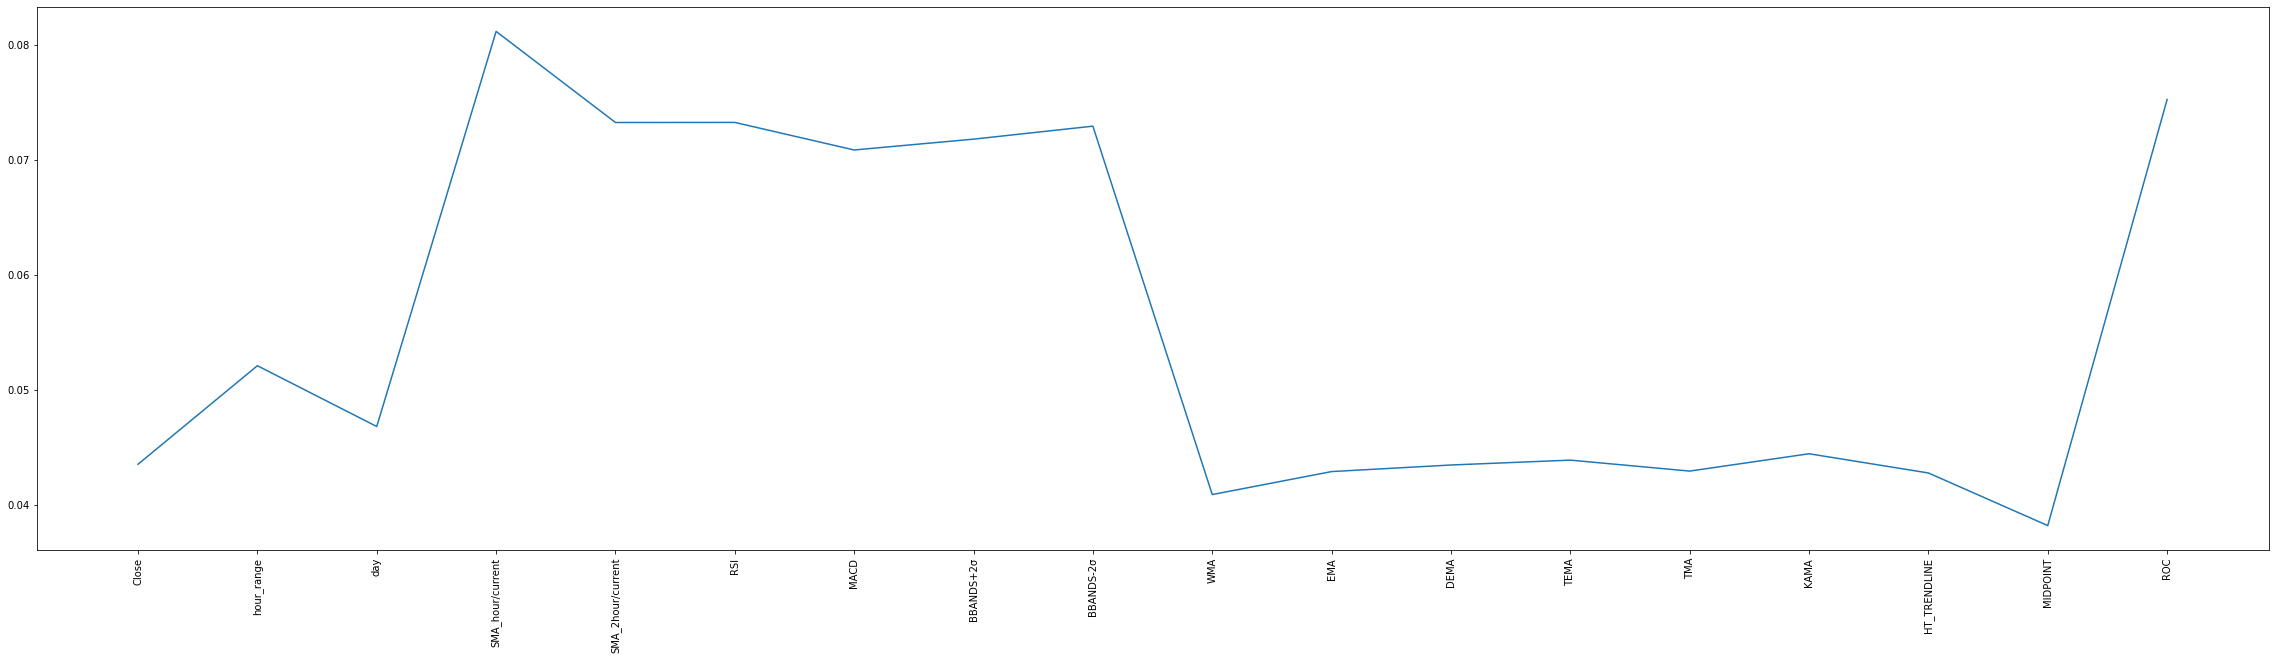

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["Close"] = df["Close"]
    df_feature["hour_range"] = df["hour_range"]
    df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA_hour/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["WMA"] = ta.WMA(close)
    df_feature["EMA"] = ta.EMA(close)
    df_feature["DEMA"] = ta.DEMA(close)
    df_feature["TEMA"] = ta.T3(close)
    df_feature["TMA"] = ta.TRIMA(close)
    df_feature["KAMA"] = ta.KAMA(close)
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close)
    df_feature["MIDPOINT"] = ta.MIDPOINT(close)
    df_feature["ROC"] = ta.ROCP(close)
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (df["Close"].pct_change(1)*100).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.9)
#print(X_train, y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_13.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()


Low/High
[26451, 26167]
0.4528301886792453
[[ 9 16]
 [13 15]]
[0.40909091 0.48387097]


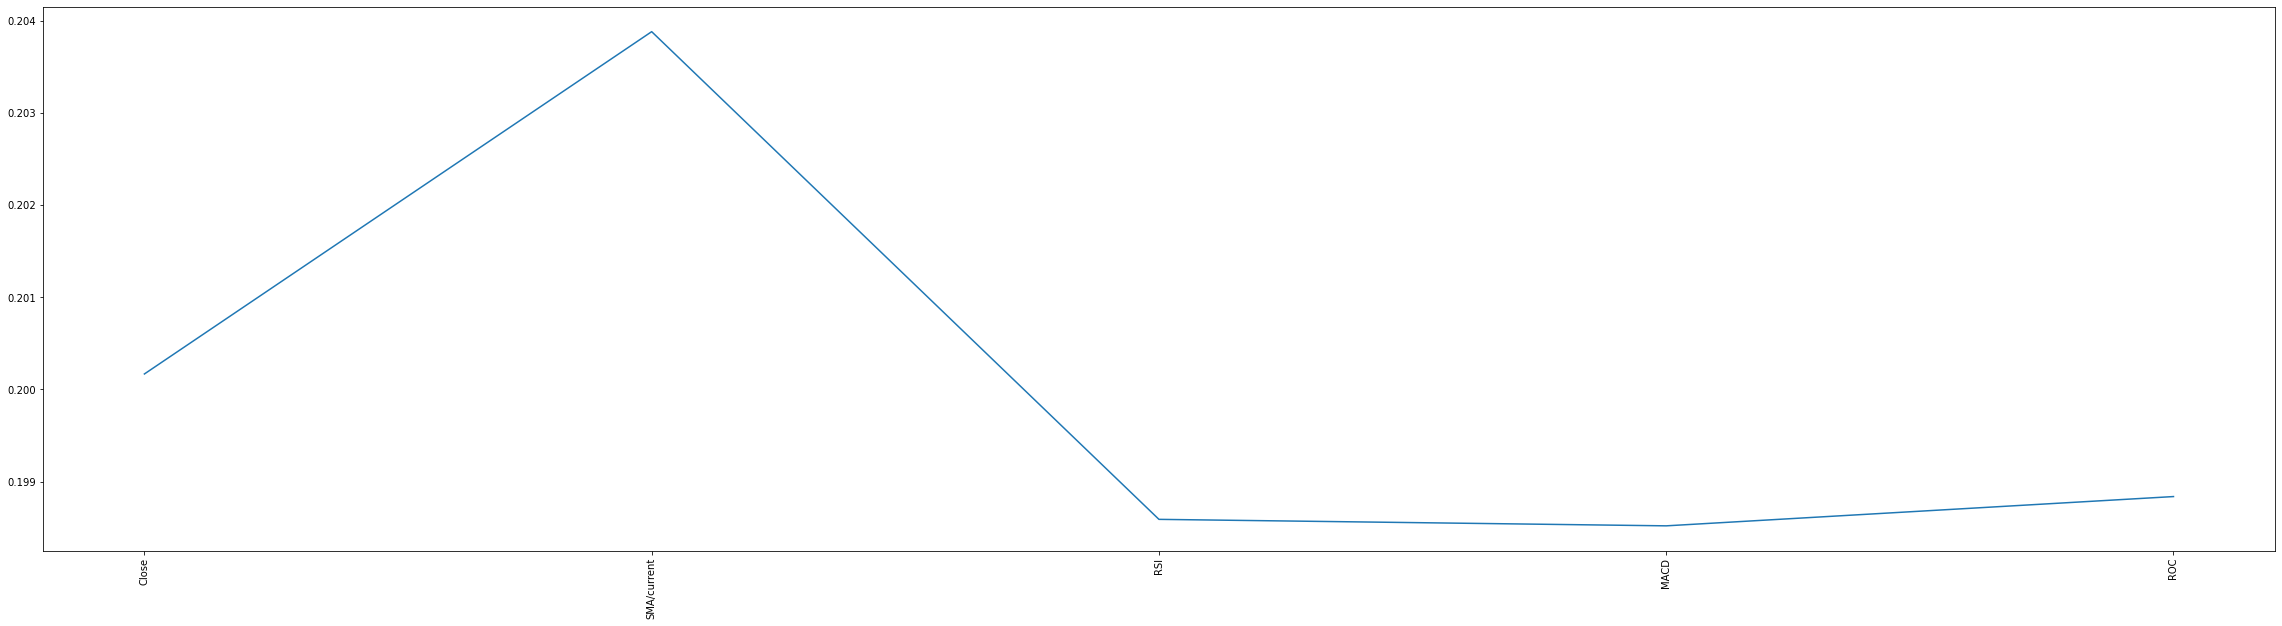

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["Close"] = df["Close"]
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=6) / close
#     df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
#     #ボリンジャーバンド 
#     upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
#     df_feature["BBANDS+2σ"] = upper / close
#     df_feature["BBANDS-2σ"] = lower / close

#     df_feature["WMA"] = ta.WMA(close)
#     df_feature["EMA"] = ta.EMA(close)
#     df_feature["DEMA"] = ta.DEMA(close)
#     df_feature["TEMA"] = ta.T3(close)
#     df_feature["TMA"] = ta.TRIMA(close)
#     df_feature["KAMA"] = ta.KAMA(close)
#     df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close)
#     df_feature["MIDPOINT"] = ta.MIDPOINT(close)
    df_feature["ROC"] = ta.ROCP(close)
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=0:
            c[0]+=1
            return 0
        elif 0<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (df["Close"].pct_change(1)*100).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.999)
#print(X_train, y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_13.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()



Low/High
[26458, 26161]
0.5115128449096099
[[2783 2527]
 [2607 2593]]
[0.51632653 0.50644531]


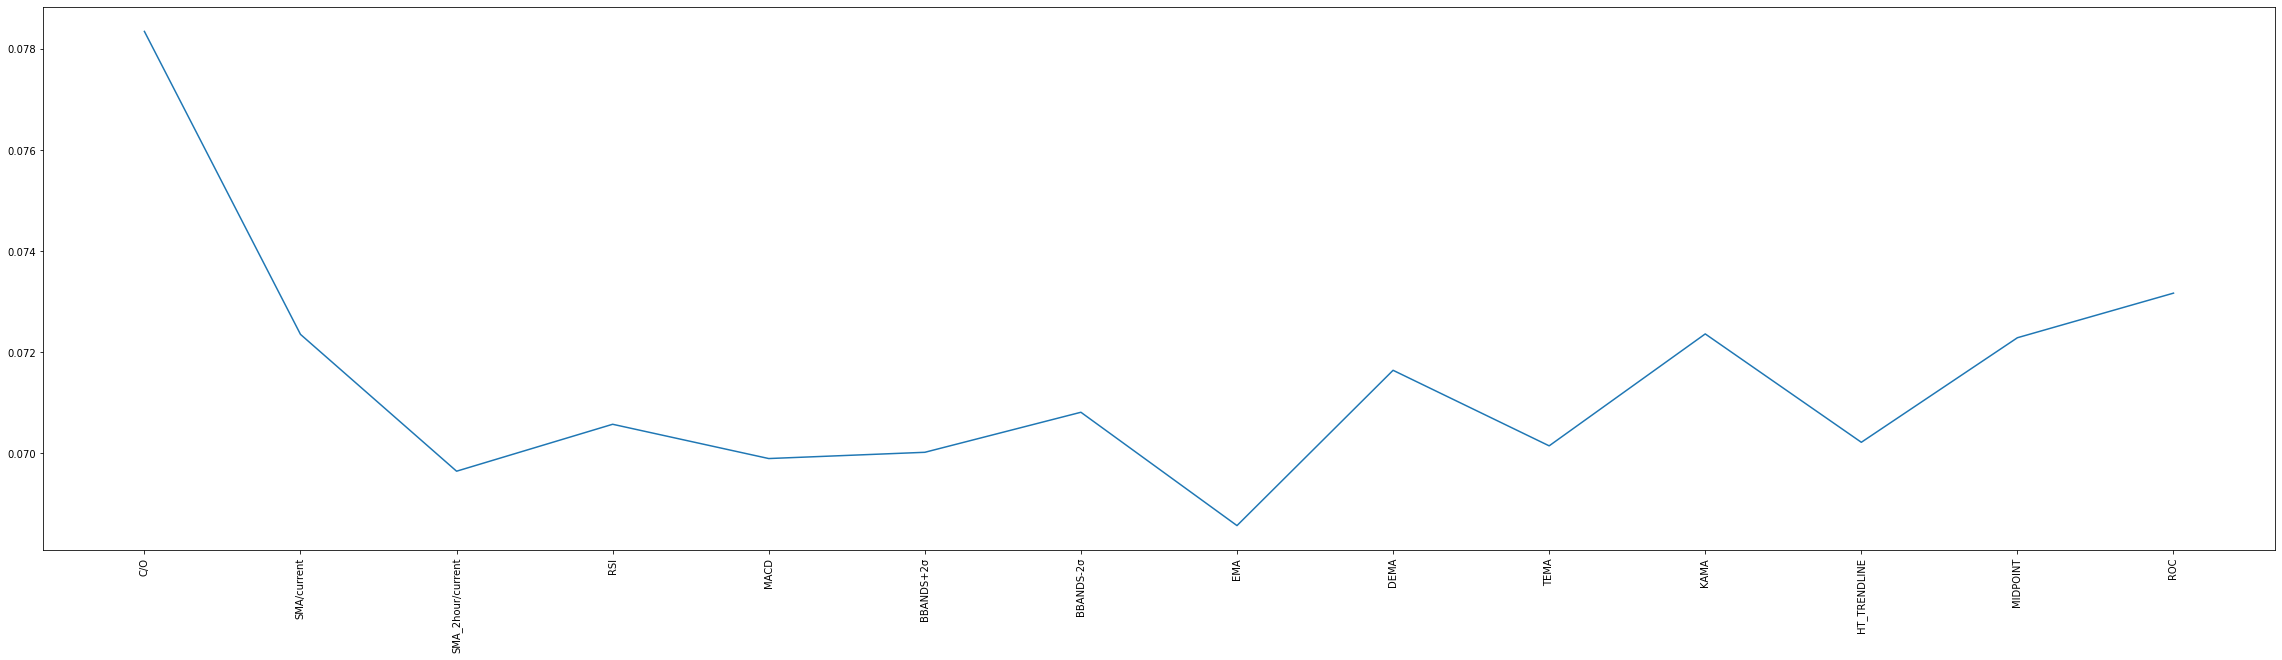

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["C/O"] = df["Close"]/df["Open"]
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    #df_feature["WMA"] = ta.WMA(close) / close
    df_feature["EMA"] = ta.EMA(close) / close
    df_feature["DEMA"] = ta.DEMA(close) / close
    df_feature["TEMA"] = ta.T3(close) / close
    #df_feature["TMA"] = ta.TRIMA(close) / close
    df_feature["KAMA"] = ta.KAMA(close) / close
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close) / close
    df_feature["MIDPOINT"] = ta.MIDPOINT(close) / close
    df_feature["ROC"] = ta.ROCP(close)
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=1:
            c[0]+=1
            return 0
        elif 1<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (df["Close"]/df["Open"]).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)
#print(X_train, y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
result = clf.predict(X_test)

print(accuracy_score(y_test, result))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, result))

from sklearn.metrics import precision_score
print(precision_score(y_test, result, average=None))

import pickle
filename = 'RF_13_co.sav'
pickle.dump(clf, open(filename, 'wb'))


plt.figure(figsize=(40,10))
plt.plot(df_adjusted.columns.values, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()




In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["C/O"] = df["Close"]/df["Open"]
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2hour/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    #df_feature["WMA"] = ta.WMA(close) / close
    df_feature["EMA"] = ta.EMA(close) / close
    df_feature["DEMA"] = ta.DEMA(close) / close
    df_feature["TEMA"] = ta.T3(close) / close
    #df_feature["TMA"] = ta.TRIMA(close) / close
    df_feature["KAMA"] = ta.KAMA(close) / close
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close) / close
    df_feature["MIDPOINT"] = ta.MIDPOINT(close) / close
    df_feature["ROC"] = ta.ROCP(close)
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=1:
            c[0]+=1
            return 0
        elif 1<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = (df["Close"]/df["Open"]).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    #print(df_adjusted)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.8)
#print(X_train, y_train)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import talib as ta


def adjust_data(dataname):
    df = pd.read_csv(dataname, index_col='Datetime')
    #以降全ての計算でレート終値を使う
    close = np.array(df["Close"])
    #特徴量を入れるための空のdataframeを作成
    df_feature = pd.DataFrame()
    df_feature["Close"] = df["Close"]
    #df_feature["hour_range"] = df["hour_range"]
    #df_feature["day"] = df["day"]
    #以下、talibを用いてテクニカル指標（今回の学習で用いる特徴量）を算出しdf_feature入れる
    #単純移動平均は、単純移動平均値とその日の終値の比を特徴量として用いる
    df_feature["SMA/current"]= ta.SMA(close, timeperiod=6) / close
    df_feature["SMA_2/current"]= ta.SMA(close, timeperiod=12) / close
    #RSI
    df_feature["RSI"] = ta.RSI(close, timeperiod=12)
    #MACD
    df_feature["MACD"], _ , _= ta.MACD(close, fastperiod=3, slowperiod=18, signalperiod=9)
    #ボリンジャーバンド 
    upper, middle, lower = ta.BBANDS(close, timeperiod=20, nbdevup=3, nbdevdn=3)
    df_feature["BBANDS+2σ"] = upper / close
    df_feature["BBANDS-2σ"] = lower / close

    df_feature["WMA"] = ta.WMA(close) / close
    df_feature["EMA"] = ta.EMA(close) / close
    df_feature["DEMA"] = ta.DEMA(close) / close
    df_feature["TEMA"] = ta.T3(close) / close
    df_feature["TMA"] = ta.TRIMA(close) / close
    df_feature["KAMA"] = ta.KAMA(close) / close
    df_feature["HT_TRENDLINE"] = ta.HT_TRENDLINE(close) / close
    df_feature["MIDPOINT"] = ta.MIDPOINT(close) / close
    df_feature["ROC"] = ta.ROCP(close) / close
    
    c=[0,0]

    # High,Low分類
    def classify(x):
        if x<=1:
            c[0]+=1
            return 0
        elif 1<x:
            c[1]+=1
            return 1

    classified = pd.DataFrame(columns=["class"])  #分類結果を格納
    classified["class"] = ((df["Close"]/df["Open"])).apply(lambda x: classify(x))

    shift = 1
    
    classified = classified.shift(-shift)  #分類結果をずらす

    df_adjusted=df_feature[70:len(df_feature)-shift]
    classified=classified[70:len(classified)-shift]
    
    print(classified)
    #print(classified.isnull().sum())
    print("Low/High")
    print(c)
    return df_adjusted, classified

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna


df_adjusted, classified = adjust_data("./20101to20209_USD_JPY_H1.csv")
X_train, X_test, y_train, y_test = train_test_split(df_adjusted, classified["class"], train_size=0.7)
#print(X_train, y_train)


from sklearn.metrics import precision_score
def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
    max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    clf = RandomForestClassifier(min_samples_split = min_samples_split, 
                                max_leaf_nodes = max_leaf_nodes,
                                criterion = criterion)
    clf.fit(X_train, y_train)
    #return 1.0 - accuracy_score(y_test, clf.predict(X_test))

    return 1.0 - precision_score(y_test, clf.predict(X_test), average=None)[1]


study = optuna.create_study()
study.optimize(objective, n_trials = 100)


print(study.best_params) # 求めたハイパーパラメータ
print(1.0 - study.best_value) # 正答率


# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# result = clf.predict(X_test)

# print(accuracy_score(y_test, result))

# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, result))

# from sklearn.metrics import precision_score
# print(precision_score(y_test, result, average=None))

# import pickle
# filename = 'RF_01.sav'
# pickle.dump(clf, open(filename, 'wb'))


# plt.figure(figsize=(40,10))
# plt.plot(df_adjusted.columns.values, clf.feature_importances_)
# plt.xticks(rotation=90)
# plt.show()






# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# result = clf.predict(X_test)

# print(accuracy_score(y_test, result))

# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, result))

# from sklearn.metrics import precision_score
# print(precision_score(y_test, result, average=None))

# import pickle
# filename = 'RF_13_co.sav'
# pickle.dump(clf, open(filename, 'wb'))


# plt.figure(figsize=(40,10))
# plt.plot(df_adjusted.columns.values, clf.feature_importances_)
# plt.xticks(rotation=90)
# plt.show()





Low/High
[26458, 26161]
                  class
Datetime               
2010-01-06 16:00    0.0
2010-01-06 17:00    1.0
2010-01-06 18:00    0.0
2010-01-06 19:00    0.0
2010-01-06 20:00    0.0
...                 ...
2020-09-30 22:00    1.0
2020-09-30 23:00    1.0
2020-10-01 00:00    1.0
2020-10-01 01:00    0.0
2020-10-01 02:00    0.0

[52548 rows x 1 columns]
Low/High
[26458, 26161]


[I 2020-10-08 18:56:16,562] A new study created in memory with name: no-name-dff906b4-555b-4128-8e02-81ece9d6f789
[I 2020-10-08 18:56:27,198] Trial 0 finished with value: 0.4659962287869265 and parameters: {'min_samples_split': 9, 'max_leaf_nodes': 44.0, 'criterion': 'entropy'}. Best is trial 0 with value: 0.4659962287869265.
[I 2020-10-08 18:56:33,068] Trial 1 finished with value: 0.4658914728682171 and parameters: {'min_samples_split': 15, 'max_leaf_nodes': 24.0, 'criterion': 'gini'}. Best is trial 1 with value: 0.4658914728682171.
[I 2020-10-08 18:56:41,320] Trial 2 finished with value: 0.47296960637767815 and parameters: {'min_samples_split': 8, 'max_leaf_nodes': 64.0, 'criterion': 'gini'}. Best is trial 1 with value: 0.4658914728682171.
[I 2020-10-08 18:56:45,948] Trial 3 finished with value: 0.4639307015052542 and parameters: {'min_samples_split': 10, 'max_leaf_nodes': 4.0, 'criterion': 'entropy'}. Best is trial 3 with value: 0.4639307015052542.
[I 2020-10-08 18:56:56,681] Trial 

[I 2020-10-08 19:00:41,261] Trial 37 finished with value: 0.46621088614251904 and parameters: {'min_samples_split': 14, 'max_leaf_nodes': 24.0, 'criterion': 'gini'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:00:46,537] Trial 38 finished with value: 0.4641102620087336 and parameters: {'min_samples_split': 15, 'max_leaf_nodes': 16.0, 'criterion': 'gini'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:00:54,476] Trial 39 finished with value: 0.4701195219123506 and parameters: {'min_samples_split': 14, 'max_leaf_nodes': 56.0, 'criterion': 'gini'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:01:00,917] Trial 40 finished with value: 0.4665144596651446 and parameters: {'min_samples_split': 16, 'max_leaf_nodes': 28.0, 'criterion': 'gini'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:01:05,617] Trial 41 finished with value: 0.4659352566707301 and parameters: {'min_samples_split': 13, 'max_leaf_nodes': 12

[I 2020-10-08 19:04:05,151] Trial 74 finished with value: 0.46462074510855 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 12.0, 'criterion': 'entropy'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:04:10,910] Trial 75 finished with value: 0.46513491851456046 and parameters: {'min_samples_split': 14, 'max_leaf_nodes': 8.0, 'criterion': 'entropy'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:04:17,498] Trial 76 finished with value: 0.46363392377885126 and parameters: {'min_samples_split': 13, 'max_leaf_nodes': 12.0, 'criterion': 'entropy'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:04:27,929] Trial 77 finished with value: 0.47192413276765655 and parameters: {'min_samples_split': 8, 'max_leaf_nodes': 44.0, 'criterion': 'entropy'}. Best is trial 34 with value: 0.46116435416964674.
[I 2020-10-08 19:04:35,349] Trial 78 finished with value: 0.46367203355432285 and parameters: {'min_samples_split': 14, 'max_leaf

{'min_samples_split': 13, 'max_leaf_nodes': 4.0, 'criterion': 'gini'}
0.5388356458303533
